<a href="https://colab.research.google.com/github/Ravi-ranjan1801/ML-Lab/blob/main/ml_lab_01_hyperparameter_tuning_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [2]:
file_path = "/content/car/car.dat"

data = []
with open(file_path) as f:
    for line in f:
        if not line.startswith("@") and line.strip():
            data.append(line.strip())

data = [row.split(",") for row in data]
df = pd.DataFrame(data)

df.head()


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
k_values = range(1, 21)
accuracies = []


In [7]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    accuracies.append(acc)


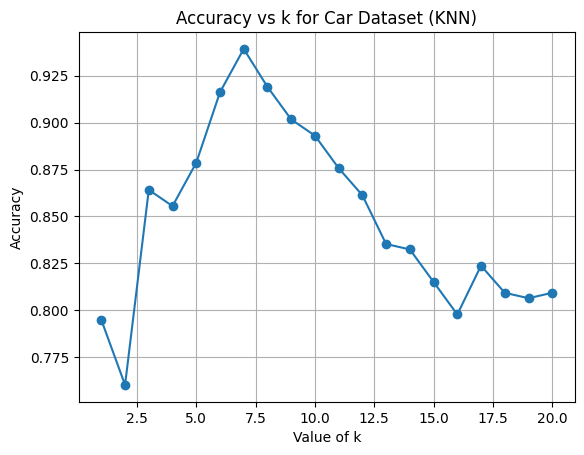

In [8]:
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k for Car Dataset (KNN)")
plt.grid(True)
plt.show()


In [9]:
best_k = k_values[accuracies.index(max(accuracies))]
print("Best k from graph:", best_k)
print("Best Accuracy:", max(accuracies))


Best k from graph: 7
Best Accuracy: 0.9393063583815029
